# TIM - The Ineference Machine

## This is the first tutorial for TIM, the code-formally-known as PEYOte.
May PEYOte rest in peace

TIM is a fast, easy to use parameter estimation code for gravitational-wave astronomy.  This tutorial will take you through the basics steps of creating a model waveform, injecting that waveform into simulated noise, and then recovering that signal.

In [2]:
import numpy as np
import pylab as plt
%pylab inline

import peyote.source as src
import peyote.parameter as par
import peyote.detector as det
import peyote.utils as utils

Populating the interactive namespace from numpy and matplotlib


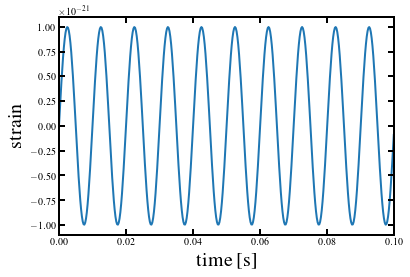

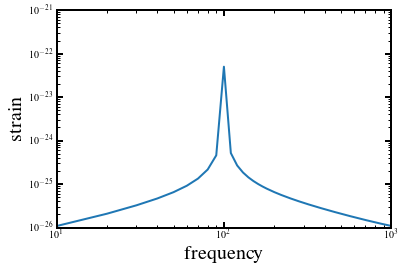

In [24]:
"""
Create a signal
"""

duration = 0.1  # second
sampling_frequency = 4096.  # Hz

time = utils.create_time_series(sampling_frequency, duration)

signal_amplitude = 1e-21  # strain
signal_frequency = 100.   # Hz

params = dict(A = signal_amplitude, f = 2.*np.pi*signal_frequency, geocent_time = time)

sine_wave_model = src.SimpleSinusoidSource("sine")
ht_signal = sine_wave_model.model(params)

hf_signal, frequencies = utils.nfft(ht_signal, sampling_frequency)

plt.plot(time, ht_signal)
plt.xlim(0, time.max())
plt.xlabel(r'time [s]')
plt.ylabel(r'strain')
plt.xlim()

plt.show()

plt.loglog(frequencies, np.abs(hf_signal))
plt.ylim(1e-26, 1e-21)
plt.xlim(10, 1000)
plt.xlabel(r'frequency')
plt.ylabel(r'strain')
plt.show()

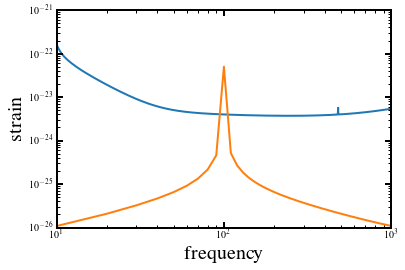

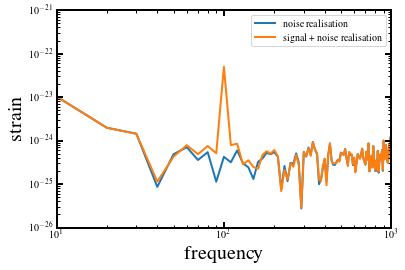

In [26]:
"""
Create a noise realisation
"""
PSD = det.PowerSpectralDensity()   # Instantiate a detector psd
PSD.import_power_spectral_density()# import the default psd
#PSD.import_power_spectral_density(spectral_density_file="CE_psd.txt")  # import cosmic explorer

hf_noise, _ = PSD.noise_realisation(sampling_frequency, duration)

plt.loglog(PSD.frequencies, PSD.amplitude_spectral_density)
plt.loglog(frequencies, np.abs(hf_signal))
plt.ylim(1e-26, 1e-21)
plt.xlim(10, 1000)
plt.xlabel(r'frequency')
plt.ylabel(r'strain')
plt.show()

plt.loglog(frequencies, np.abs(hf_noise), label='noise realisation')
plt.loglog(frequencies, np.abs(hf_signal + hf_noise), label='signal + noise realisation')
plt.ylim(1e-26, 1e-21)
plt.xlim(10, 1000)
plt.xlabel(r'frequency')
plt.ylabel(r'strain')

plt.legend(loc='best')
plt.show()
